# Network Analysis with Python 


This notebook contains exercises for getting started with network analysis in Python. The main topics we will cover in this class are:
1. Analysing a network
2. Plotting a network

In [1]:
# Install Networkx
! pip install networkx 

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype = int)

In [5]:
#Quick snapshot of the Network
print nx.info(G_fb)

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


In [6]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(G_fb)

In [9]:
spring_pos

{0: array([ 0.72740775,  0.47475648], dtype=float32),
 1: array([ 0.72711515,  0.49577644], dtype=float32),
 2: array([ 0.80284894,  0.44844517], dtype=float32),
 3: array([ 0.71834284,  0.46313894], dtype=float32),
 4: array([ 0.79674453,  0.49708828], dtype=float32),
 5: array([ 0.71058708,  0.50204355], dtype=float32),
 6: array([ 0.81160432,  0.47611502], dtype=float32),
 7: array([ 0.66467124,  0.51446313], dtype=float32),
 8: array([ 0.79726565,  0.42288008], dtype=float32),
 9: array([ 0.69847667,  0.47979552], dtype=float32),
 10: array([ 0.71475756,  0.49903843], dtype=float32),
 11: array([ 0.81403542,  0.49848455], dtype=float32),
 12: array([ 0.82001799,  0.47924665], dtype=float32),
 13: array([ 0.70208001,  0.47705677], dtype=float32),
 14: array([ 0.80734354,  0.45258862], dtype=float32),
 15: array([ 0.82071829,  0.46944538], dtype=float32),
 16: array([ 0.73133767,  0.47831637], dtype=float32),
 17: array([ 0.80867255,  0.45000789], dtype=float32),
 18: array([ 0.78955

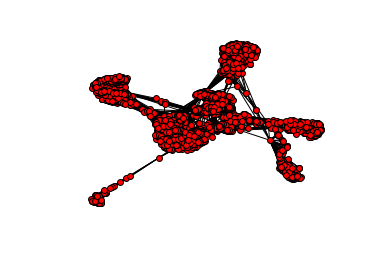

In [7]:
plt.axis("off")
nx.draw_networkx(G_fb, pos = spring_pos, with_labels = False, node_size = 35)

In [ ]:
# What is the average clustering of the nodes in this graph?
# What is the average shortest path length?
# Do this make it a small-world like network? Is this what you would expect?

In [10]:
from multiprocessing import Pool
import itertools

In [11]:
def partitions(nodes, n):
    "Partitions the nodes into n subsets"
    nodes_iter = iter(nodes)
    while True:
        partition = tuple(itertools.islice(nodes_iter,n))
        if not partition:
            return
        yield partition

In [12]:
def btwn_pool(G_tuple):
    return nx.betweenness_centrality_source(*G_tuple)

In [13]:
def between_parallel(G, processes = None):
    p = Pool(processes=processes)
    part_generator = 4*len(p._pool)
    node_partitions = list(partitions(G.nodes(), int(len(G)/part_generator)))
    num_partitions = len(node_partitions)
 
    bet_map = p.map(btwn_pool,
                        zip([G]*num_partitions,
                        [True]*num_partitions,
                        [None]*num_partitions,
                        node_partitions))
 
    bt_c = bet_map[0]
    for bt in bet_map[1:]:
        for n in bt:
            bt_c[n] += bt[n]
    return bt_c

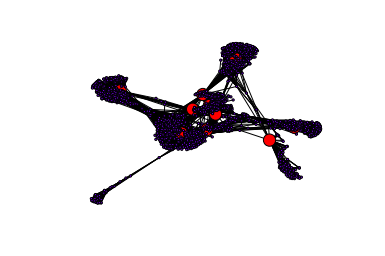

In [14]:

bt = between_parallel(G_fb)
top = 10

max_nodes =  sorted(bt.iteritems(), key = lambda v: -v[1])[:top]
bt_values = [5]*len(G_fb.nodes())
bt_colors = [0]*len(G_fb.nodes())
for max_key, max_val in max_nodes:
    bt_values[max_key] = 150
    bt_colors[max_key] = 2
 
plt.axis("off")
nx.draw_networkx(G_fb, pos = spring_pos, cmap = plt.get_cmap("rainbow"), node_color = bt_colors, node_size = bt_values, with_labels = False)


## Extra Tasks##

see NetworkX documentation here https://networkx.github.io/documentation/networkx-1.9.1/reference/algorithms.html

1. Find the k-clique communities in this network
2. What is the centrality of node 14?
3. Run a hive plot of the data with 2 k-clique communities as the dimensions (follow  https://github.com/ericmjl/hiveplot)